# Experiment 6+7

In [ ]:
! tar czf Experiments.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random

In [2]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Variables

In [2]:
seeds = range(1,51)
n_episodes = 1
max_steps = 100
n_think_indices = [4,10]
models = ["0", "e1", "r4", "r10"]

levels = {"coin_collector": 14, "cooking": 9, "treasure_hunter": 27}

In [3]:
with open(f"./games/max_scores_simple.pickle", "rb") as f:
    max_scores_simple = pickle.load(f)
max_scores_simple = max_scores_simple[:len(seeds)]

with open(f"./games/max_scores_cooking.pickle", "rb") as f:
    max_scores_cooking = pickle.load(f)

# Data aggregation for visualization

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import bootstrap

In [5]:
final_arrays_scores_exp6 = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}
final_arrays_times_exp6 = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}

for n in models:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            with open(f"./Experiment 6/{n}think_{game}_level{level}.pickle", "rb") as f:
                results_all_seeds = pickle.load(f)
            
            final_scores = [run[-1][1] for run in results_all_seeds] # score
            if game == "cooking":
                final_scores = np.array(final_scores) / max_scores_cooking[level - 1]
            avg_final_score = np.mean(final_scores)
            bootstrap_score = bootstrap(data=(final_scores,), 
                                statistic=np.mean,
                                method="basic",
                                n_resamples=1000,
                                confidence_level=0.9)
            final_arrays_scores_exp6[game][n][0].append(avg_final_score)
            final_arrays_scores_exp6[game][n][1].append((bootstrap_score.confidence_interval.high, bootstrap_score.confidence_interval.low))

            final_times = [run[-1][2] for run in results_all_seeds] # time
            avg_final_time = np.mean(final_times)
            bootstrap_time = bootstrap(data=(final_times,), 
                                statistic=np.mean,
                                method="basic",
                                n_resamples=1000,
                                confidence_level=0.9)
            final_arrays_times_exp6[game][n][0].append(avg_final_time)
            final_arrays_times_exp6[game][n][1].append((bootstrap_time.confidence_interval.high, bootstrap_time.confidence_interval.low))

final_arrays_scores_exp7 = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}
final_arrays_times_exp7 = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}

for n in models:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            try:
                
                with open(f"./Experiment 7/{n}think_{game}_level{level}.pickle", "rb") as f:
                    results_all_seeds = pickle.load(f)
                try:
                    with open(f"./Experiment 7/{n}think_{game}_level{level}_extended.pickle", "rb") as f:
                        results_all_seeds += pickle.load(f)
                except:
                    pass
            
                final_scores = [run[-1][1] for run in results_all_seeds] # score
                if game == "cooking":
                    final_scores = np.array(final_scores) / max_scores_cooking[level - 1]
                avg_final_score = np.mean(final_scores)
                bootstrap_score = bootstrap(data=(final_scores,), 
                                    statistic=np.mean,
                                    method="basic",
                                    n_resamples=1000,
                                    confidence_level=0.9)
                final_arrays_scores_exp7[game][n][0].append(avg_final_score)
                final_arrays_scores_exp7[game][n][1].append((bootstrap_score.confidence_interval.high, bootstrap_score.confidence_interval.low))

                final_times = [run[-1][2] for run in results_all_seeds] # time
                avg_final_time = np.mean(final_times)
                bootstrap_time = bootstrap(data=(final_times,), 
                                    statistic=np.mean,
                                    method="basic",
                                    n_resamples=1000,
                                    confidence_level=0.9)
                final_arrays_times_exp7[game][n][0].append(avg_final_time)
                final_arrays_times_exp7[game][n][1].append((bootstrap_time.confidence_interval.high, bootstrap_time.confidence_interval.low))

            except:
                pass

# Visualization

In [6]:
figsize=(15,25)

In [7]:
custom_palette = ['#c44e52', '#55a868', '#64b5cd', '#ccb974']
custom_linestyles = ["-", "-", "-.", "--"]

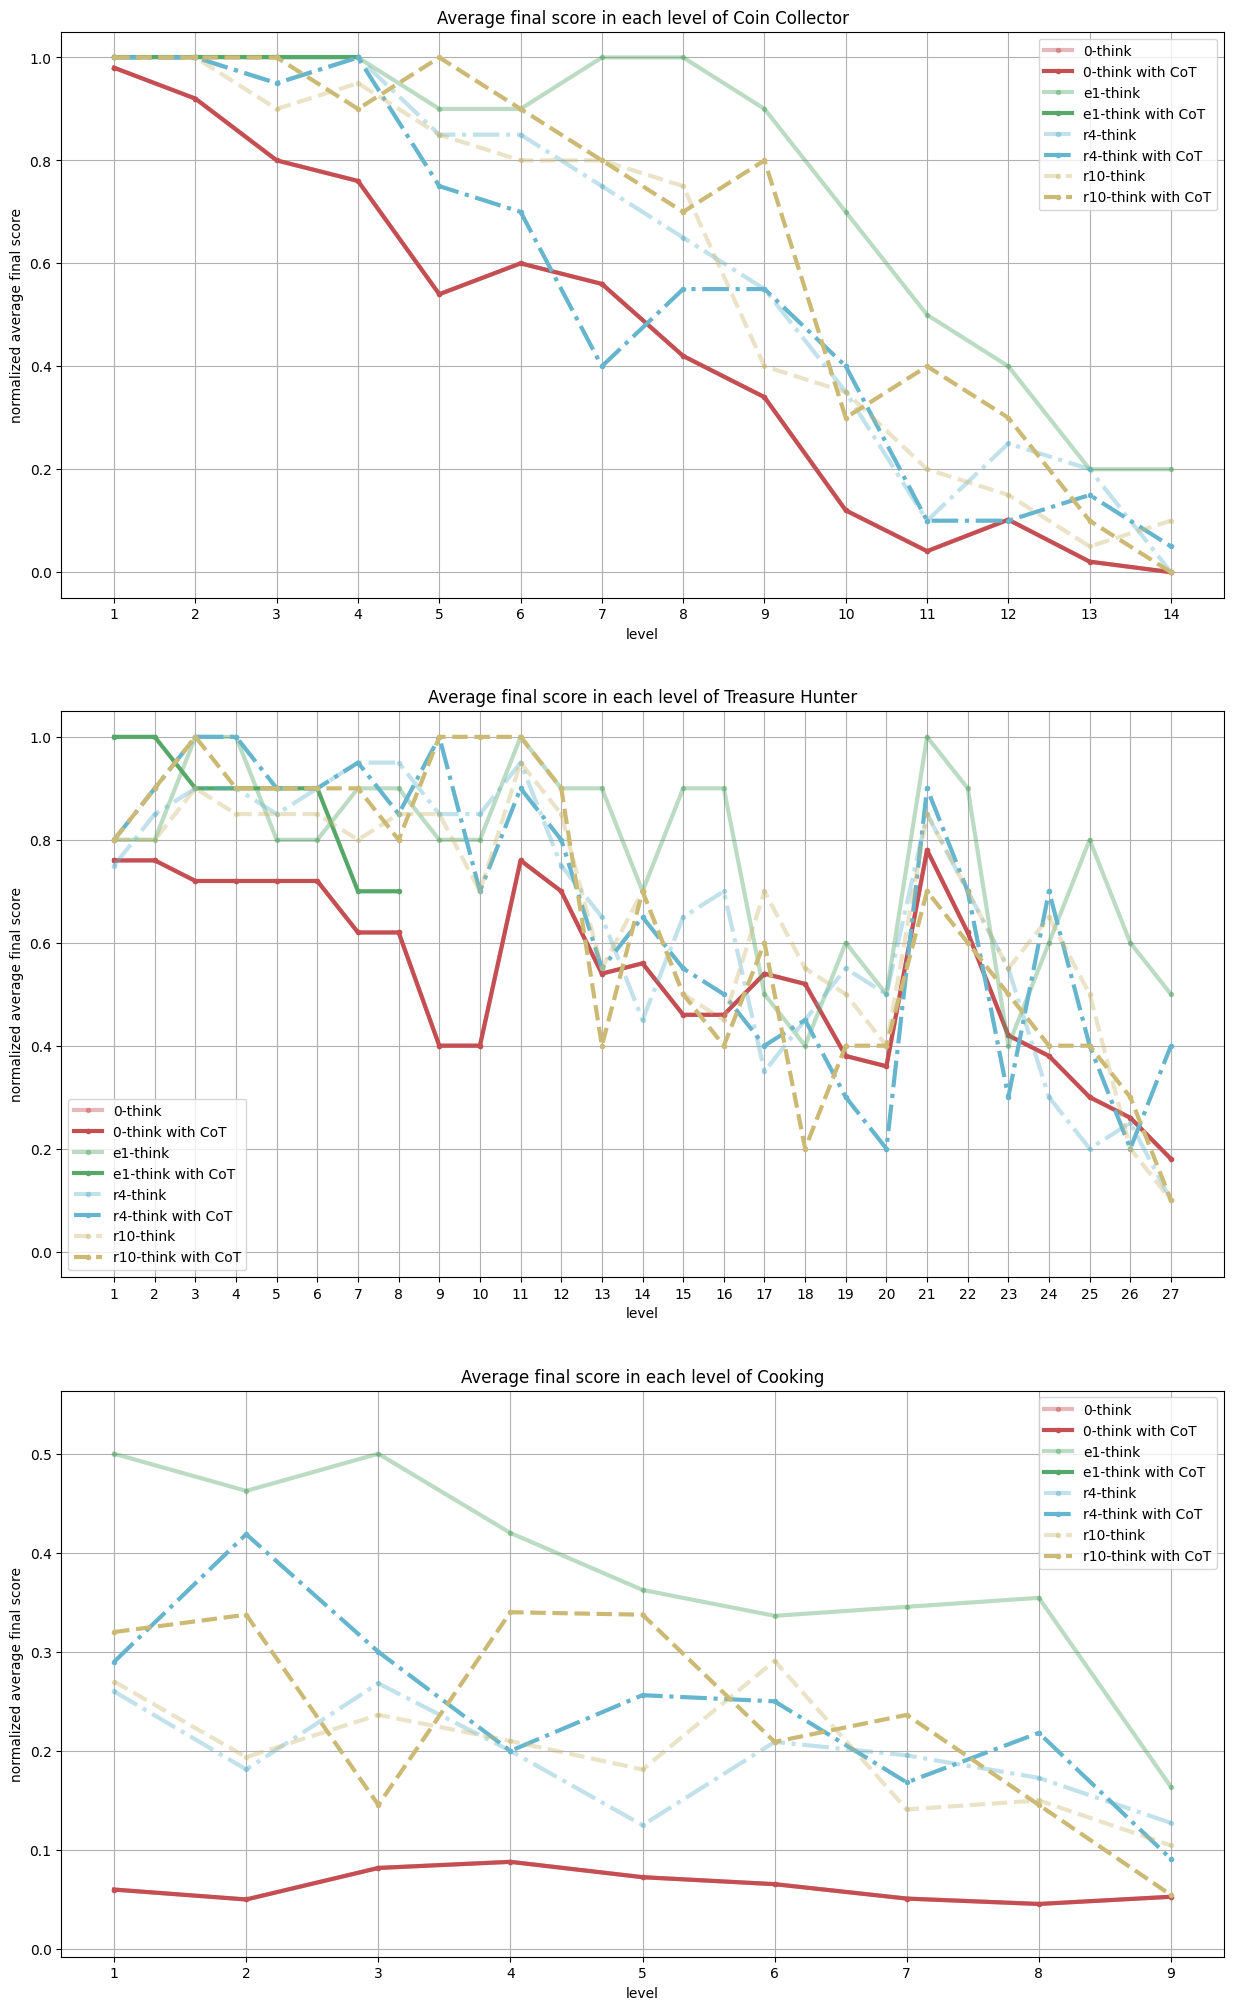

In [12]:
# %%%%% SCORE %%%%%

fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "cooking": "Cooking", "treasure_hunter": "Treasure Hunter"}

for i, game in enumerate(final_arrays_scores_exp7.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    for j, model in enumerate(models):
        y_old, _ = final_arrays_scores_exp6[game][model]
        y, y_ci = final_arrays_scores_exp7[game][model]

        ax.fill_between(x[:len(y)],
                        np.clip([k[0] for k in y_ci], 0, 1),
                        np.clip([k[1] for k in y_ci], 0, 1),
                        alpha=0.0,
                        color=custom_palette[j])

        ax.plot(x[:len(y_old)], y_old, label=f"{model}-think", marker=".", linestyle=custom_linestyles[j], linewidth=3, color=custom_palette[j], alpha=0.4)
        ax.plot(x[:len(y)], y, label=f"{model}-think with CoT", marker=".", linestyle=custom_linestyles[j], linewidth=3, color=custom_palette[j])
    
    ax.set_xlabel('level')
    ax.set_ylabel('normalized average final score')
    ax.set_title(f"Average final score in each level of {prettified_names[game]}")
    ax.legend()

    ax.set_xticks(x)
    ax.grid()

plt.show()

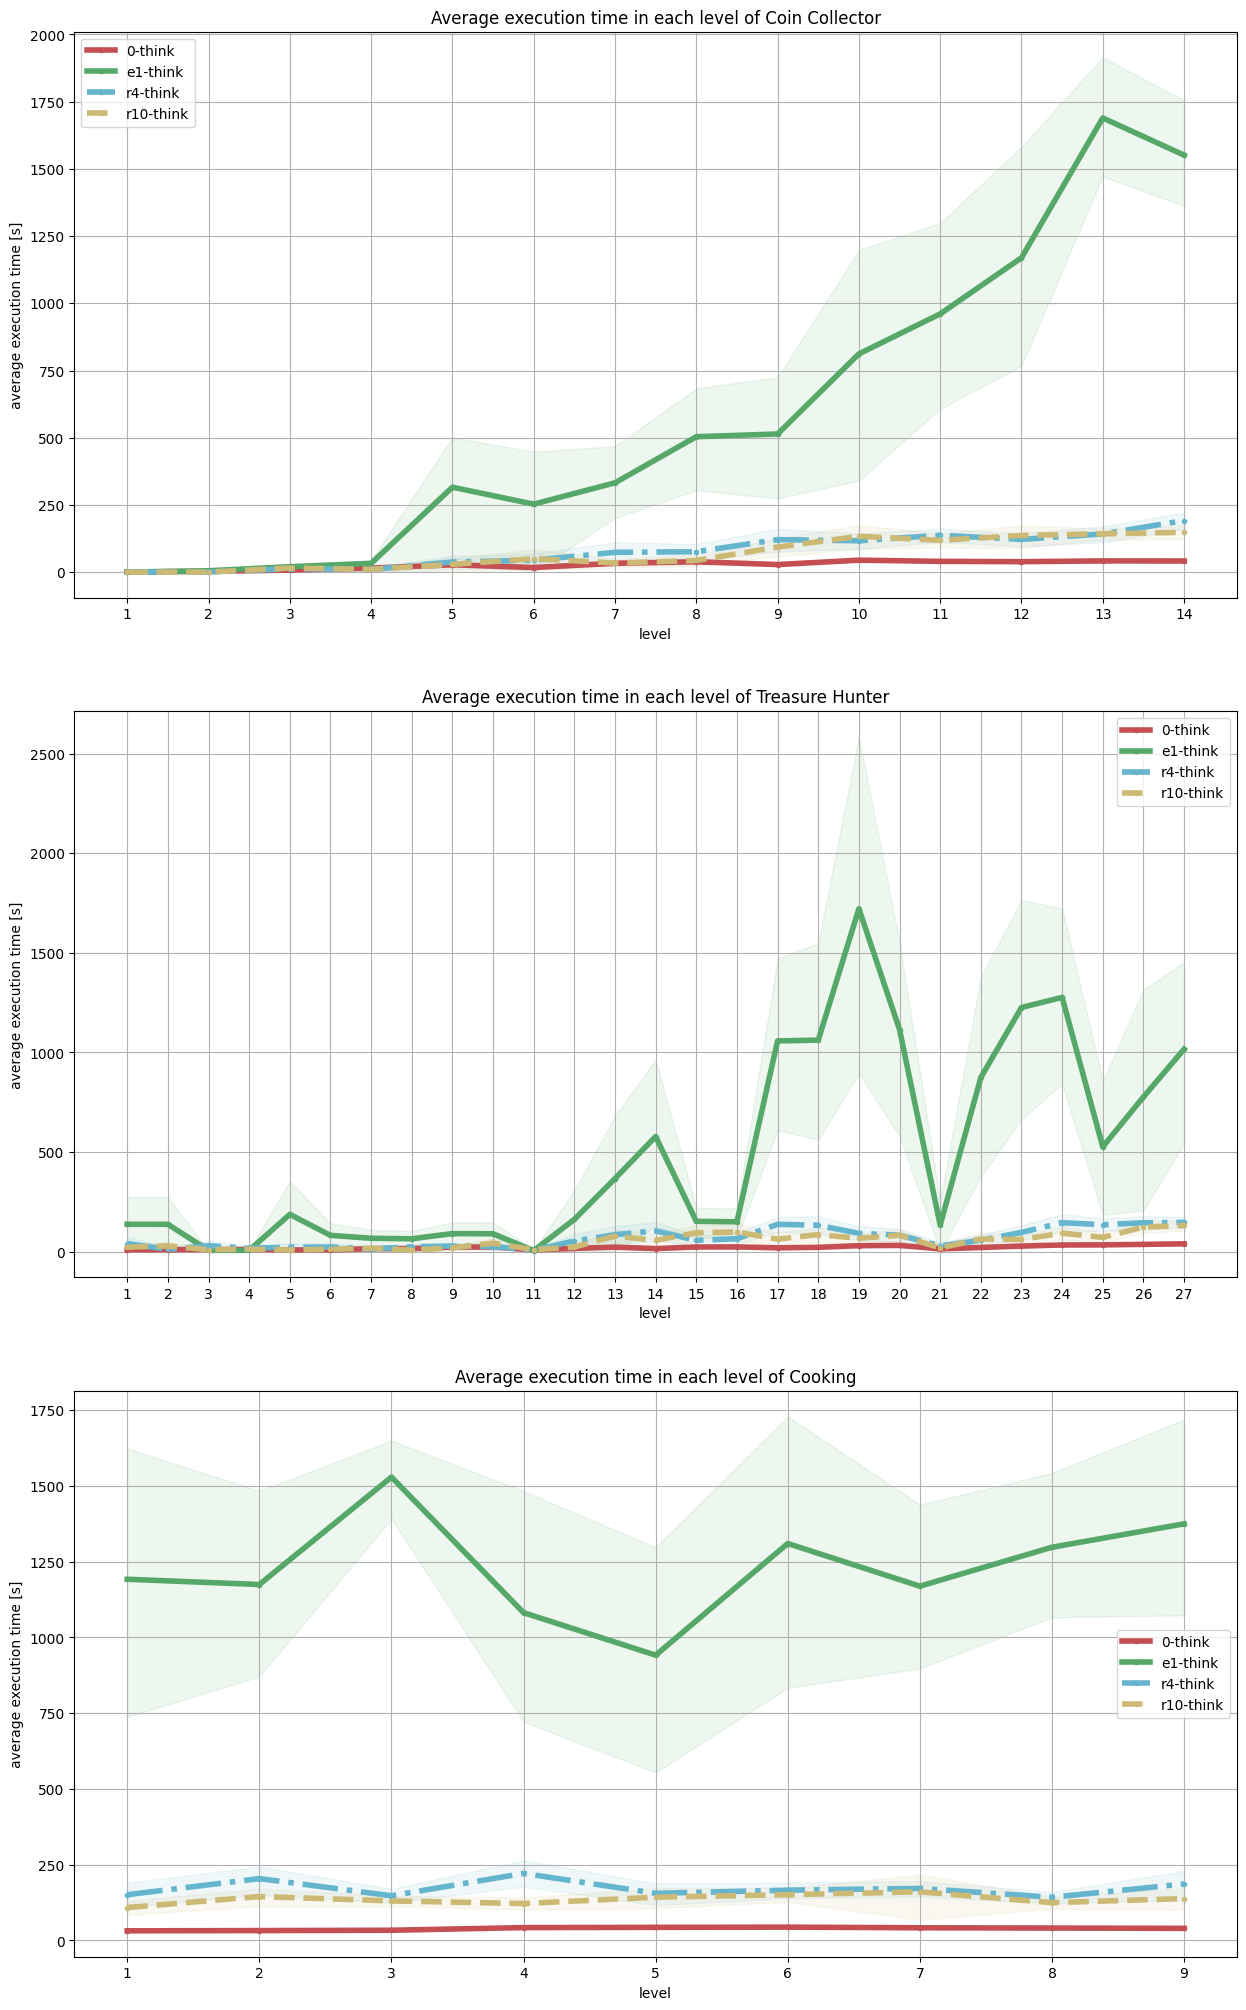

In [ ]:
# %%%%% EXECUTION TIME %%%%%
fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "cooking": "Cooking", "treasure_hunter": "Treasure Hunter"}

for i, game in enumerate(final_arrays_times_exp6.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    for j, model in enumerate(models):
        y, y_ci = final_arrays_times_exp6[game][model]

        ax.fill_between(x,
                        np.clip([k[0] for k in y_ci], 0, a_max=None),
                        np.clip([k[1] for k in y_ci], 0, a_max=None),
                        alpha=0.1,
                        color=custom_palette[j])

        ax.plot(x, y, label=f"{model}-think", marker=".", linestyle=custom_linestyles[j], linewidth=4, color=custom_palette[j])
    
    ax.set_xlabel('level')
    ax.set_ylabel('average execution time [s]')
    ax.set_title(f"Average execution time in each level of {prettified_names[game]}")
    ax.legend()

    ax.set_xticks(x)
    ax.grid()

plt.show()